In [94]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
from seaborn import distplot
from yellowbrick.features.radviz import radviz

plt.rcParams['figure.figsize']=(12,8)

In [4]:
data = pd.read_csv('train_data/train_data.csv')
data

,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,RUL
0,0,1,25.0074,0.6200,60.0,462.54,536.84,1256.52,1043.97,7.05,...,84.93,14.35,8.4712,NaN,NaN,NaN,NaN,NaN,NaN,339
1,0,2,35.0072,0.8413,100.0,449.44,555.44,1364.42,1128.75,5.48,...,100.00,14.88,8.9928,NaN,NaN,NaN,NaN,NaN,NaN,338
2,0,3,25.0053,0.6215,60.0,462.54,536.42,1265.94,1047.23,7.05,...,84.93,14.21,8.5107,NaN,NaN,NaN,NaN,NaN,NaN,337
3,0,4,42.0045,0.8407,100.0,445.00,549.41,1355.52,1115.81,3.91,...,100.00,10.63,6.4578,NaN,NaN,NaN,NaN,NaN,NaN,336
4,0,5,35.0046,0.8400,100.0,449.44,555.21,1361.04,1123.63,5.48,...,100.00,14.95,9.0279,NaN,NaN,NaN,NaN,NaN,NaN,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,708,159,10.0040,0.2519,100.0,489.05,605.81,1508.72,1333.13,10.52,...,100.00,28.48,16.8884,NaN,NaN,NaN,NaN,NaN,NaN,4
160355,708,160,10.0074,0.2500,100.0,489.05,605.83,1509.90,1328.53,10.52,...,100.00,28.20,16.9498,NaN,NaN,NaN,NaN,NaN,NaN,3
160356,708,161,34.9982,0.8400,100.0,449.44,556.62,1374.56,1145.17,5.48,...,100.00,14.76,8.9228,NaN,NaN,NaN,NaN,NaN,NaN,2
160357,708,162,24.9993,0.6219,60.0,462.54,537.58,1274.92,1064.82,7.05,...,84.93,14.05,8.3890,NaN,NaN,NaN,NaN,NaN,NaN,1


# Cleaning

In [78]:
def clean_data(dataframe) :
    clean_df= dataframe.copy()
    #Drop sensors 22 to 27 with missing values
    clean_df = clean_df.drop(['sensor_' + str(i) for i in range(22,28)], axis = 1)
    
    #Settings columns correspond to categroical values, converting them to int
    clean_df[['op_setting_3', 'op_setting_1']] = clean_df[['op_setting_3', 'op_setting_1']].astype('int') 
    clean_df['op_setting_2'] = (100 * clean_df['op_setting_2']).astype('int')
    return clean_df

clean = clean_data(data)

# Settings

In [86]:
settings = clean[['op_setting_3', 'op_setting_1', 'op_setting_2']]
settings.value_counts()

op_setting_3  op_setting_1  op_setting_2
100           0             0               62633
              42            84              23053
              35            84              13963
60            25            62              13851
100           10            25              13842
              20            70              13802
              41            84               5800
              9             25               3478
              19            70               3411
60            24            62               3290
100           34            84               3236
dtype: int64

In [96]:
setting_configurations = settings.groupby(settings.columns.tolist(),as_index=False).size()
setting_configurations

,op_setting_3,op_setting_1,op_setting_2,size
0,60,24,62,3290
1,60,25,62,13851
2,100,0,0,62633
3,100,9,25,3478
4,100,10,25,13842
5,100,19,70,3411
6,100,20,70,13802
7,100,34,84,3236
8,100,35,84,13963
9,100,41,84,5800


# Failing cycles 

In [40]:
n_cycles = data.groupby('engine_no').time_in_cycles.max()

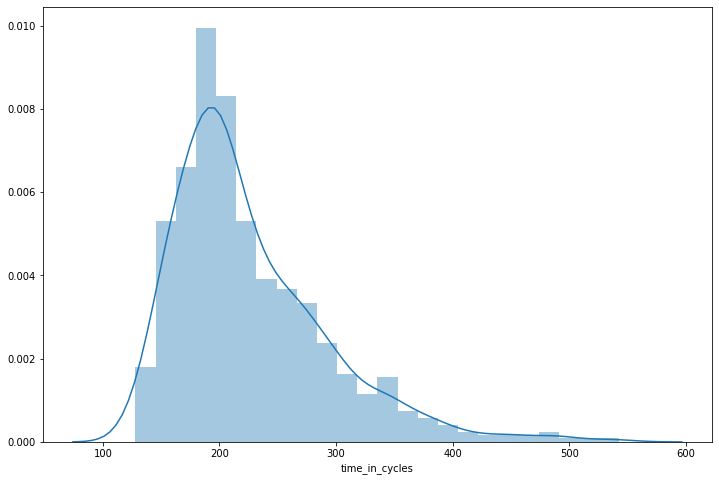

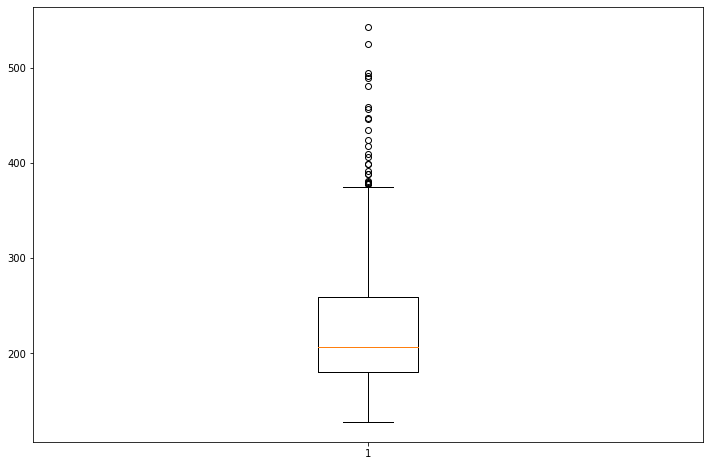

In [53]:
distplot(n_cycles)
plt.figure()
plt.boxplot(n_cycles)
plt.show()

# Settings

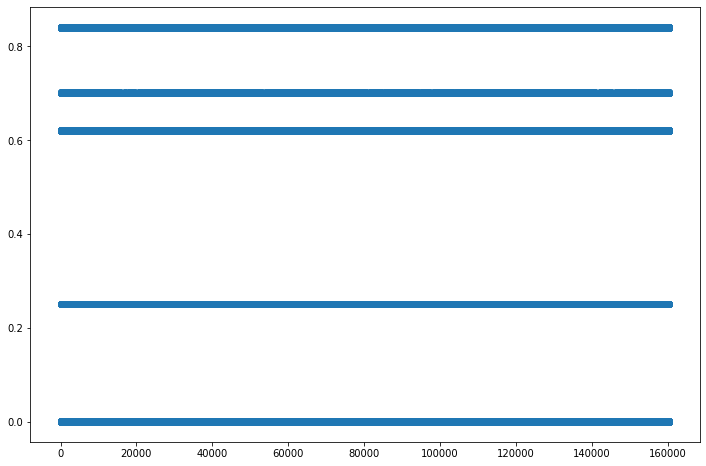

In [63]:
data.op_setting_2.plot(style = 'o')

plt.show()